<a href="https://colab.research.google.com/github/ShivinM-17/Tensorflow_practises/blob/main/Food_vision_big_milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Milestone Project 1 : Food Vision Big

### Check the GPU availabitlity

Google Colab offers many free GPUs, some of which are not compatible for mixed-precision training

Some of the GPUs are:
* K80 (Not Compatible)
* P100 (Not Compatible)
* Tesla T4 (Compatible)

For doing mixed-precision training, we will use Tesla-T4 GPU

In [ ]:
# Checking the GPU
!nvidia-smi

Thu Nov 23 09:01:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Get helper functions

In [ ]:
# Download the helper function scripts
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-11-23 09:05:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-23 09:05:09 (93.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Importing the series of helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

### Using Tensorflow Datasets to download the data

In [ ]:
!pip install tensorflow==2.4.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [ ]:
# Ge tensorflow datasets
import tensorflow_datasets as tfds

In [ ]:
# List all available datasets
datasets_list = tfds.list_builders() # Get all available datasets in TFDS
print("food101" in datasets_list) # Check if the dataset is available or not

True


In [ ]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=['train', 'validation'],
                                             shuffle_files=True,
                                             as_supervised=True, # data gets returned in tuple format (data, label)
                                             with_info=True
                                             )


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteLIEE0E/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteLIEE0E/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


### Exploring the Food101 data from tensorflow datasets

Getting more information of the dataset:
* Class names
* Shape of the input data (image tensors)
* Datatype of the input data
* type of labels we have (one-hot encoded or label encoded)
* Check if the labels match up with the class names

In [ ]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features['label'].names
class_names[:10], len(class_names)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito'],
 101)

In [ ]:
# Get one sample of the train data
train_one_sample = train_data.take(4)  # samples are in format (image_tensor, label)

In [ ]:
# Checking out the one sample of the training data
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Output info about the training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape},
  Image datatype: {image.dtype},
  Target class from Food101 (tensor form): {label},
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food101 (tensor form): 56,
  Class name (str form): huevos_rancheros
  

  Image shape: (384, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food101 (tensor form): 76,
  Class name (str form): pizza
  

  Image shape: (512, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food101 (tensor form): 21,
  Class name (str form): chocolate_cake
  

  Image shape: (512, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food101 (tensor form): 64,
  Class name (str form): miso_soup
  


In [ ]:
# Checking out the image tensor
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[118,  69,  88],
        [117,  68,  87],
        [114,  65,  84],
        ...,
        [ 98,  62,  48],
        [ 99,  60,  45],
        [ 98,  59,  44]],

       [[115,  66,  85],
        [113,  64,  83],
        [111,  62,  81],
        ...,
        [ 98,  62,  48],
        [100,  61,  46],
        [ 98,  59,  44]],

       [[109,  62,  80],
        [107,  60,  78],
        [105,  58,  76],
        ...,
        [ 98,  62,  48],
        [100,  61,  46],
        [ 99,  60,  45]],

       ...,

       [[ 26,  24,  37],
        [ 25,  23,  36],
        [ 25,  23,  36],
        ...,
        [ 28,  26,  39],
        [ 27,  27,  39],
        [ 26,  26,  38]],

       [[ 26,  24,  37],
        [ 25,  23,  36],
        [ 25,  23,  36],
        ...,
        [ 28,  26,  37],
        [ 26,  26,  38],
        [ 26,  26,  38]],

       [[ 26,  24,  37],
        [ 25,  23,  36],
        [ 25,  23,  36],
        ...,
        [ 27,  25,  3

In [ ]:
# Checking out the min and max values of the image tensor
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=21>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from the tensorflow dataset

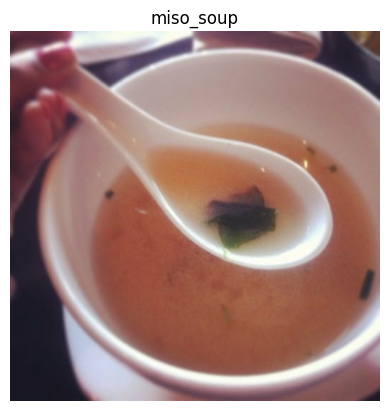

In [ ]:
# Plot the image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

### Creating preprocessing function for the data

Preprocessing the images, so as to make the neural networks perform the best.

Thus, we will have to apply batched, normalization, etc.

Current info of the data:
* datatype: `uint8`
* Comprised of all different size tensors (different sized images)
* Not scaled btw 0 and 1

We have to preprocess them to such:
* Data be in `float32` dtype (or for mixed precision `float16` and `float32`)
* Same batch sizes for the images
* Scaled (btw 0 and 1), normalizing the images

Since, here we will be using EfficientNetBX pre-trained model, there is no need for rescaling, since a rescaling layer is already built-in the network.

In [ ]:
(image, label)

(<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[118,  69,  88],
         [117,  68,  87],
         [114,  65,  84],
         ...,
         [ 98,  62,  48],
         [ 99,  60,  45],
         [ 98,  59,  44]],
 
        [[115,  66,  85],
         [113,  64,  83],
         [111,  62,  81],
         ...,
         [ 98,  62,  48],
         [100,  61,  46],
         [ 98,  59,  44]],
 
        [[109,  62,  80],
         [107,  60,  78],
         [105,  58,  76],
         ...,
         [ 98,  62,  48],
         [100,  61,  46],
         [ 99,  60,  45]],
 
        ...,
 
        [[ 26,  24,  37],
         [ 25,  23,  36],
         [ 25,  23,  36],
         ...,
         [ 28,  26,  39],
         [ 27,  27,  39],
         [ 26,  26,  38]],
 
        [[ 26,  24,  37],
         [ 25,  23,  36],
         [ 25,  23,  36],
         ...,
         [ 28,  26,  37],
         [ 26,  26,  38],
         [ 26,  26,  38]],
 
        [[ 26,  24,  37],
         [ 25,  23,  36],
         [ 25,

In [ ]:
# Make function for preprocessing images
def preprocessing_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes
  image to [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape])

  # image = image / 255. # Not required, since we will be using EfficientNet

  return tf.cast(image, tf.float32), label  # return (float32_image, label) tuple

In [ ]:
# Preprocessing a single sample image and checking the outputs
preprocessed_img = preprocessing_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}")
print(f"\nImage before preprocessing:\n {preprocessed_img[:2]}..., \nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[118  69  88]
  [117  68  87]
  [114  65  84]
  ...
  [ 98  62  48]
  [ 99  60  45]
  [ 98  59  44]]

 [[115  66  85]
  [113  64  83]
  [111  62  81]
  ...
  [ 98  62  48]
  [100  61  46]
  [ 98  59  44]]]..., 
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image before preprocessing:
 [[[115.015305  66.015305  85.015305]
  [108.95408   59.954082  78.95408 ]
  [101.28571   54.285713  72.28571 ]
  ...
  [ 86.86233   55.43876   45.      ]
  [ 96.739815  60.739815  48.59693 ]
  [ 99.05607   60.056065  45.056065]]

 [[102.73979   55.739796  73.73979 ]
  [ 98.43367   51.43367   69.43367 ]
  [ 94.        47.        65.      ]
  ...
  [ 90.05621   58.515347  47.71431 ]
  [ 97.93368   61.933674  49.79079 ]
  [ 99.97449   60.974487  45.974487]]]..., 
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


### Batch and prepare dataset

Here, we are mapping the preprocessing_img function to both train and test data, then, we shuffle them (only train data), then batch thme together and make sure to prepare new batches whilst the model goes through the current batch

In [ ]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocessing_img,
                            num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle train_data and turn it into batches and prefetch it (loading it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocessing_img,
                          num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

## NOTE - prefetch() speedens up the data loading speed
## NOTE - cache() only works if the dataset can fit in the ram
## This function makes the data store in the memory, thus helps to load in the data faster

### Creating modelling callbacks

Creating a couple of callbacks:
* Tensorboard callback
* Model checkpoint callback to save the model's progress after feature extraction

In [ ]:
# Create tensorboard callback
from helper_functions import create_tensorboard_callback

# Create ModelCheckpint callback to save a model's progress during training
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                            monitor='val_acc',
                                            save_best_only = True,
                                            save_weights_only = True,
                                            verbose=0
                                            )

### Setup mixed precision training

In [ ]:
# Turn on mixed precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

### Build feature extraction model

In [ ]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=64>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name='softmax_float32')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Getting the summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

### Checking the datatypes of the different layers ( checking if we are really using mixed precision )


In [ ]:
# Checking the datatypes of the different layers
# checking if we are really using mixed precision
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetv2-b0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [ ]:
# Checking dtype policy in the base_model layers
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_1 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1a_project_activation False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False float32 <Policy "mixed_float16">
block2a_expand_activation False float32 <Policy "mixed_float16">
block2a_project_conv False float32 <Policy "mixed_float16">
block2a_project_bn False float32 <Policy "mixed_float16">
block2b_expand_conv False float32 <Policy "mixed_float16">
block2b_expand_bn False float32 <Policy "mixed_float16">
block2b_expand_activation False float32 <Policy "mixed_float16">
block2b_project_conv False float32 <Po

### Fit the feature extraction model

In [ ]:
# Fit the model to the training data
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=5,
                                                     steps_per_epoch = len(train_data),
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     callbacks = [create_tensorboard_callback(dir_name='training_logs',
                                                                                              experiment_name="efficientnetb0_food101"),
                                                                  model_checkpoint]
                                                      )

Saving TensorBoard log files to: training_logs/efficientnetb0_food101/20231123-110037
Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 1.7436 - accuracy: 0.5771

2368/2368 [==============================] - 246s 95ms/step - loss: 1.7436 - accuracy: 0.5771 - val_loss: 1.1407 - val_accuracy: 0.7018
Epoch 2/5
2368/2368 [==============================] - ETA: 0s - loss: 1.2114 - accuracy: 0.6866

2368/2368 [==============================] - 218s 90ms/step - loss: 1.2114 - accuracy: 0.6866 - val_loss: 1.0339 - val_accuracy: 0.7262
Epoch 3/5
2368/2368 [==============================] - ETA: 0s - loss: 1.0632 - accuracy: 0.7217

2368/2368 [==============================] - 208s 86ms/step - loss: 1.0632 - accuracy: 0.7217 - val_loss: 0.9849 - val_accuracy: 0.7341
Epoch 4/5
2368/2368 [==============================] - ETA: 0s - loss: 0.9665 - accuracy: 0.7467

2368/2368 [==============================] - 204s 85ms/step - loss: 0.9665 - accuracy: 0.7467 - val_loss: 0.9709 - val_accuracy: 0.7402
Epoch 5/5
2367/2368 [============================>.] - ETA: 0s - loss: 0.8971 - accuracy: 0.7636

2368/2368 [==============================] - 203s 84ms/step - loss: 0.8971 - accuracy: 0.7636 - val_loss: 0.9540 - val_accuracy: 0.7447


In [ ]:
# Evaluate the model on whole test datasets
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 58s 74ms/step - loss: 0.9619 - accuracy: 0.7376


[0.9619000554084778, 0.7375841736793518]